In [1]:

import pandas as pd
import matplotlib as plt
import seaborn as sns

# Загрузка и знакомство с данными

In [106]:
df = pd.read_csv('data/all_v2.csv')

In [107]:
df.head(10)

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,20:00:21,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,12:04:54,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,15:44:00,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,11:24:52,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11
4,5450000,2018-03-01,17:42:43,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1
5,3300000,2018-03-02,21:18:42,55.908253,37.726448,81,1,4,5,1,32.0,6.0,1
6,4704280,2018-03-04,12:35:25,55.621097,37.431002,3,2,1,25,1,31.7,6.0,11
7,3600000,2018-03-04,20:52:38,59.875526,30.395457,2661,1,2,5,1,31.1,6.0,1
8,3390000,2018-03-05,07:07:05,53.195031,50.106952,3106,2,4,24,2,64.0,13.0,11
9,2800000,2018-03-06,09:57:10,55.736972,38.846457,81,1,9,10,2,55.0,8.0,1


In [108]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477006 entries, 0 to 5477005
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   price          5477006 non-null  int64  
 1   date           5477006 non-null  object 
 2   time           5477006 non-null  object 
 3   geo_lat        5477006 non-null  float64
 4   geo_lon        5477006 non-null  float64
 5   region         5477006 non-null  int64  
 6   building_type  5477006 non-null  int64  
 7   level          5477006 non-null  int64  
 8   levels         5477006 non-null  int64  
 9   rooms          5477006 non-null  int64  
 10  area           5477006 non-null  float64
 11  kitchen_area   5477006 non-null  float64
 12  object_type    5477006 non-null  int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 543.2+ MB


In [109]:
df['region'] = df['region'].astype('category')
df['building_type'] = df['building_type'].astype('category')
df['object_type'] = df['object_type'].astype('category')

In [110]:
df['level'] = df['level'].astype('int8')
df['levels'] = df['levels'].astype('int8')
df['rooms'] = df['rooms'].astype('int8')
df['rooms'] = df['rooms'].astype('int8')


In [111]:

df['area'] = df['area'].astype('float16')
df['kitchen_area'] = df['kitchen_area'].astype('float16')
df['kitchen_area'] = df['kitchen_area'].astype('float16')
df['geo_lat'] = df['geo_lat'].astype('float32')
df['geo_lon'] = df['geo_lon'].astype('float32')

In [112]:
df.describe()

/home/andrey/work/institute/MLE/assets/eda/.venv_eda/lib/python3.10/site-packages/pandas/core/nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
/home/andrey/work/institute/MLE/assets/eda/.venv_eda/lib/python3.10/site-packages/numpy/_core/_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/andrey/work/institute/MLE/assets/eda/.venv_eda/lib/python3.10/site-packages/pandas/core/nanops.py:731: RuntimeWarning: invalid value encountered in scalar divide
  the_mean = the_sum / count if count > 0 else np.nan
/home/andrey/work/institute/MLE/assets/eda/.venv_eda/lib/python3.10/site-packages/pandas/core/nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
/home/andrey/work/institute/MLE/assets/eda/.venv_eda/lib/python3.10/site-packages/numpy/_core/_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdi

,price,geo_lat,geo_lon,level,levels,rooms,area,kitchen_area
count,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06
mean,4.422029e+06,5.403825e+01,5.324431e+01,6.214530e+00,1.139892e+01,1.726173e+00,NaN,NaN
std,2.150752e+07,4.622758e+00,2.074763e+01,4.957419e+00,6.535734e+00,1.082133e+00,0.000000e+00,0.000000e+00
min,-2.144967e+09,4.145906e+01,1.989020e+01,1.000000e+00,1.000000e+00,-2.000000e+00,7.000732e-02,1.000214e-02
25%,1.950000e+06,5.337767e+01,3.777790e+01,2.000000e+00,5.000000e+00,1.000000e+00,3.800000e+01,7.000000e+00
50%,2.990000e+06,5.517139e+01,4.306774e+01,5.000000e+00,1.000000e+01,2.000000e+00,4.803125e+01,9.703125e+00
75%,4.802000e+06,5.622613e+01,6.564895e+01,9.000000e+00,1.600000e+01,2.000000e+00,6.312500e+01,1.270312e+01
max,2.147484e+09,7.198040e+01,1.625361e+02,3.900000e+01,3.900000e+01,1.000000e+01,7.856000e+03,1.000000e+04


In [113]:
cat_features = df.select_dtypes(include=['category']).columns.to_list()
cat_features

['region', 'building_type', 'object_type']

In [114]:
num_features = df.select_dtypes(include=['number']).columns.to_list()
num_features

['price',
 'geo_lat',
 'geo_lon',
 'level',
 'levels',
 'rooms',
 'area',
 'kitchen_area']

In [115]:
df = df.drop(columns=['date', 'time'])

In [116]:
df.info(show_counts=True) # уменьшили размер в 3 раза (135 Мб против 543)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477006 entries, 0 to 5477005
Data columns (total 11 columns):
 #   Column         Non-Null Count    Dtype   
---  ------         --------------    -----   
 0   price          5477006 non-null  int64   
 1   geo_lat        5477006 non-null  float32 
 2   geo_lon        5477006 non-null  float32 
 3   region         5477006 non-null  category
 4   building_type  5477006 non-null  category
 5   level          5477006 non-null  int8    
 6   levels         5477006 non-null  int8    
 7   rooms          5477006 non-null  int8    
 8   area           5477006 non-null  float16 
 9   kitchen_area   5477006 non-null  float16 
 10  object_type    5477006 non-null  category
dtypes: category(3), float16(2), float32(2), int64(1), int8(3)
memory usage: 135.8 MB


In [117]:
for cat in cat_features:
    print(f'{cat} - numer of unique = {df[cat].nunique()}')

region - numer of unique = 84
building_type - numer of unique = 6
object_type - numer of unique = 2


In [118]:
for col in cat_features:
    print(f'Unique categories in {col}: {df[col].value_counts()}')

Unique categories in region: region
9654     1049435
2843      637224
81        500368
2661      461820
3         439511
          ...   
16705        139
69            77
4963          65
1901          12
61888          5
Name: count, Length: 84, dtype: int64
Unique categories in building_type: building_type
1    1955661
3    1892756
2    1130731
0     307165
4     174356
5      16337
Name: count, dtype: int64
Unique categories in object_type: object_type
1     3863809
11    1613197
Name: count, dtype: int64


# Очистка данных

In [119]:
df = df.loc[df['price'] > 50000]
df = df.query('area >= 8')
df = df.query('kitchen_area >= 3')
df = df.query('kitchen_area < area')
df = df.query('rooms != -2')
df = df.query('level <= levels')


In [120]:
# меняем признак "студии" -1 на 0
df.loc[df['rooms'] == -1, 'rooms'] = 0 

# Анализ признаков для модели

https://seaborn.pydata.org/examples/index.html - галерея примеров

## displot

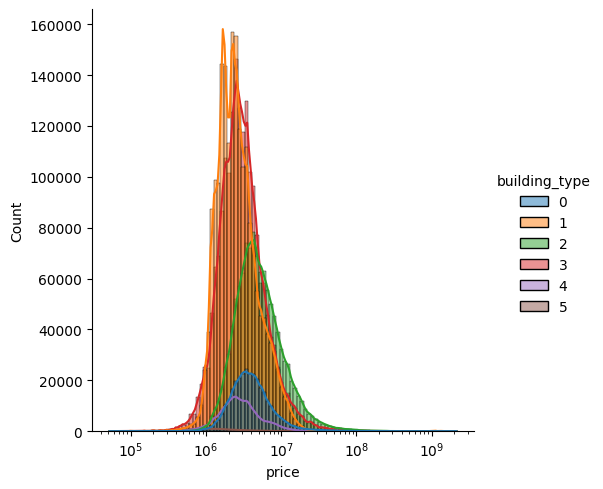

In [39]:
sns.displot(df, x='price', bins=100, hue='building_type', kde=True, log_scale=True)

In [42]:
# Создаем новый признак - уровень высоты этажа в здании
df['floor_level'] = df.apply(lambda x: 'low' if x['level']/x['levels'] <= 0.3 \
                             else 'hi' if x['level']/x['levels'] > 0.7 \
                             else 'mid', axis = 1) 

In [46]:
df['floor_level'] = df.apply(lambda x: 'first' if x['level'] == 1 \
                            else 'last' if x['level'] == x['levels'] \
                            else x['floor_level'], axis = 1)

In [48]:
df['floor_level'].value_counts()

floor_level
mid      2092890
hi       1208629
low       740915
last      697099
first     654013
Name: count, dtype: int64

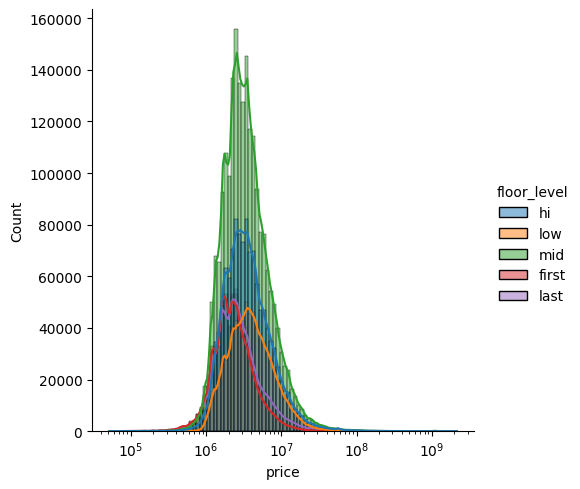

In [49]:
sns.displot(df, x='price', bins=100, hue='floor_level', kde=True, log_scale=True)

## heatmap

<Axes: >

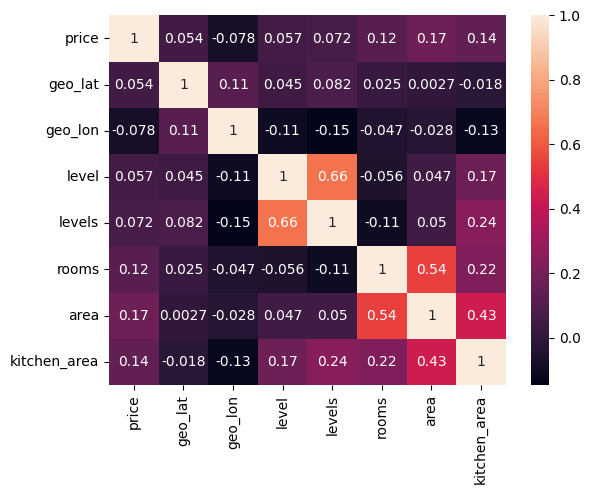

In [34]:
feature_correlation = df[num_features].corr()
sns.heatmap(feature_correlation, annot=True)

# Групповые операции

In [50]:
def flat_index(df_stats): 
    df_stats.columns = df_stats.columns.get_level_values(0) + '_' +  df_stats.columns.get_level_values(1) 
    df_stats.columns = df_stats.columns.to_flat_index() 
    df_stats.reset_index(inplace=True) 
    return df_stats

In [75]:
aggregated_df = df[num_features+['building_type']].groupby(by='building_type').agg(['mean', 'std'])
aggregated_df = flat_index(aggregated_df)
aggregated_df 

/tmp/ipykernel_1524625/3084051676.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_df = df[num_features+['building_type']].groupby(by='building_type').agg(['mean', 'std'])


,building_type,price_mean,price_std,geo_lat_mean,geo_lat_std,geo_lon_mean,geo_lon_std,level_mean,level_std,levels_mean,levels_std,rooms_mean,rooms_std,area_mean,area_std,kitchen_area_mean,kitchen_area_std
0,0,5.284833e+06,1.279574e+07,53.747444,5.098192,55.518322,22.517204,8.851292,5.923950,16.738440,6.499030,1.686900,0.934588,58.559349,37.077482,12.792236,6.599672
1,1,3.512978e+06,1.952254e+07,54.790298,3.357936,61.443077,21.923780,5.571202,4.060143,10.213742,4.642660,1.794023,0.966615,51.407722,25.746609,9.298869,4.062081
2,2,7.126816e+06,1.267507e+07,53.999779,5.346035,42.106968,13.565219,9.031732,6.130808,16.850670,6.862993,1.697287,0.928301,57.157982,32.994183,13.154365,6.146328
3,3,4.068649e+06,8.331654e+06,53.556213,4.910420,51.249592,19.097178,4.929223,3.997643,8.741839,5.626125,1.878324,0.944347,55.062199,36.979730,10.442657,6.912905
4,4,4.004994e+06,3.367351e+07,51.181896,5.909806,47.777088,17.570242,5.430987,4.308443,9.746289,5.743188,1.811687,0.892482,52.034588,42.411056,10.051356,4.793207
5,5,2.618608e+06,1.543122e+07,56.440563,3.981515,63.951946,28.464556,2.472882,3.850120,3.766808,5.931042,2.031180,0.907434,50.446354,52.361071,9.285330,4.603177


## lineplot

<Axes: xlabel='building_type', ylabel='price_mean'>

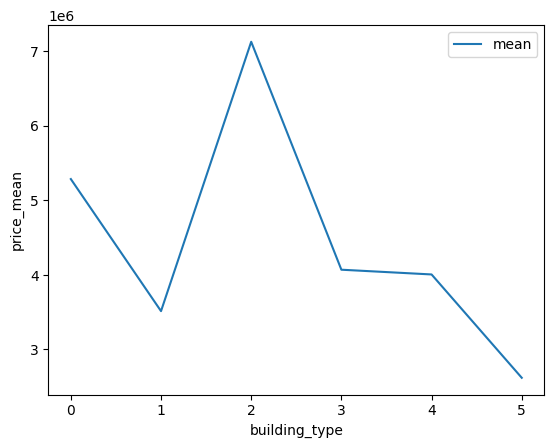

In [63]:

sns.lineplot(aggregated_df,x='building_type',y='price_mean', label='mean')

## subplots

<Axes: xlabel='building_type', ylabel='area'>

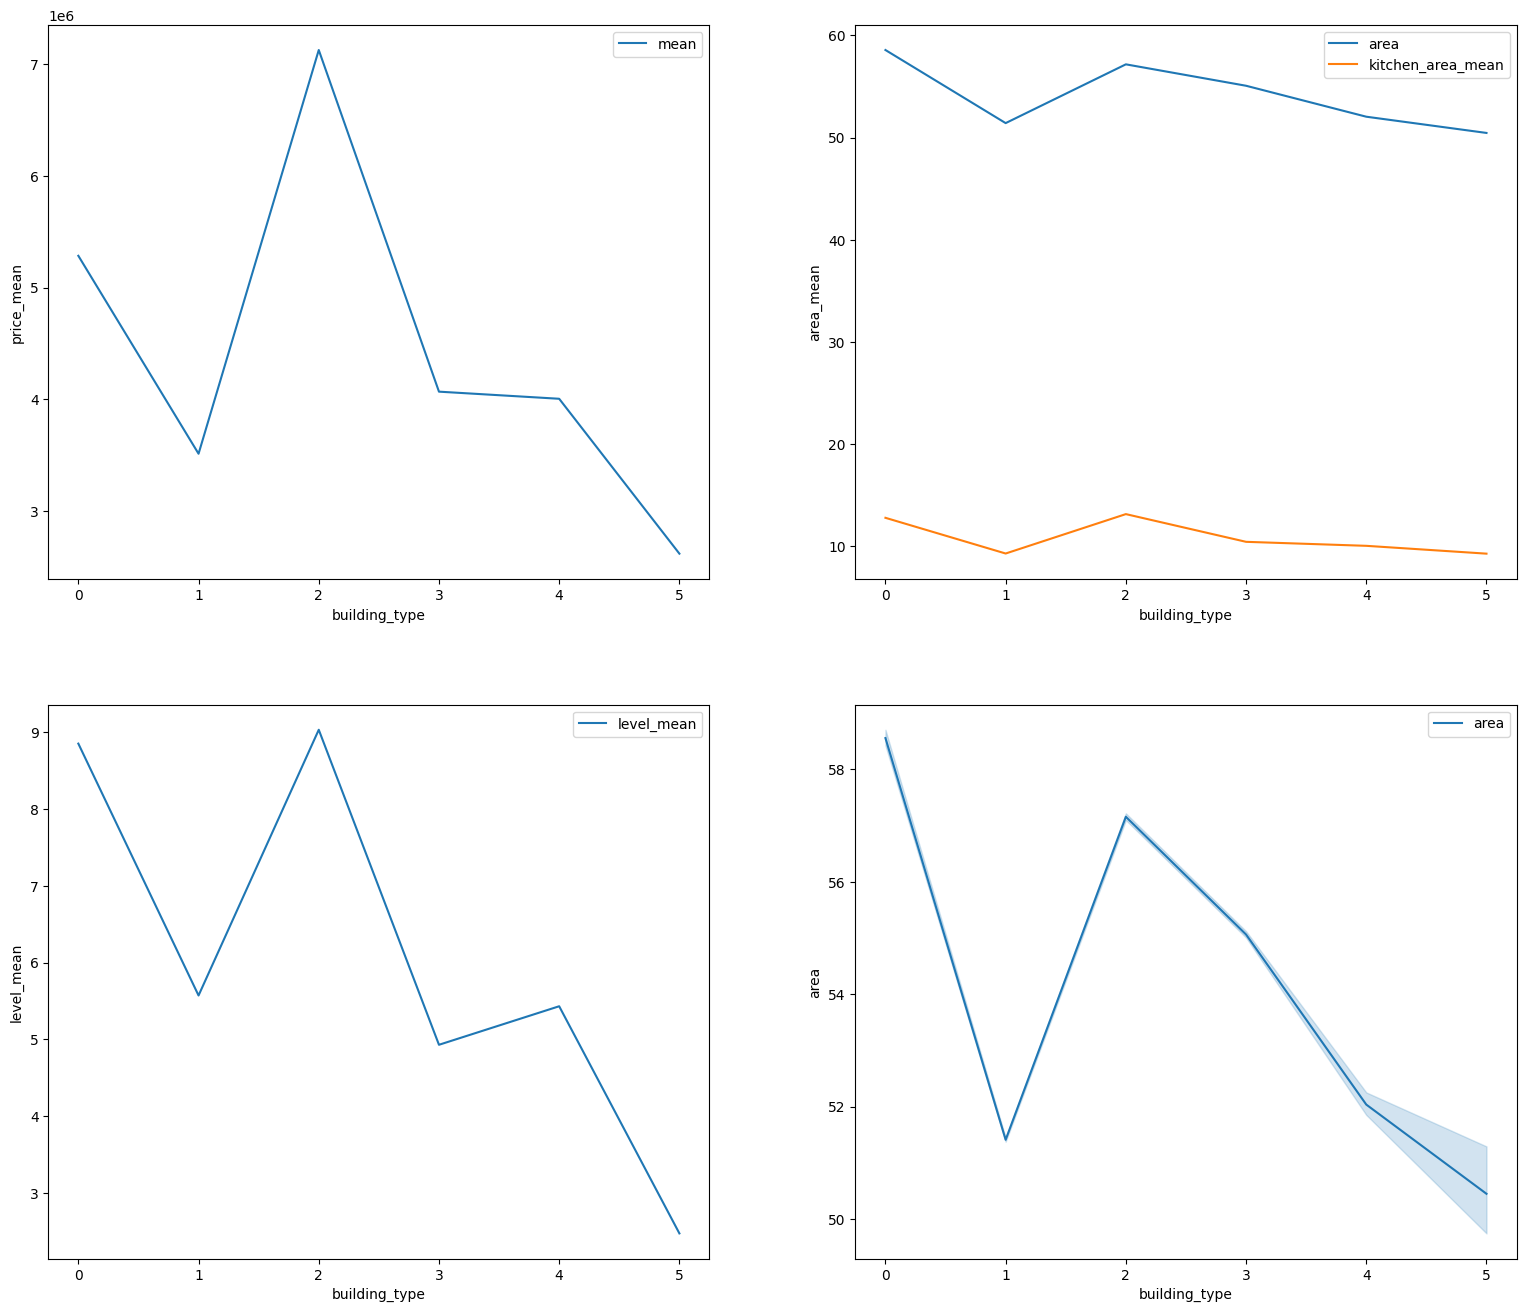

In [67]:
fig, axs = plt.pyplot.subplots(2,2)
fig.tight_layout(pad=1)
fig.set_size_inches(16.5, 14, forward=True)

sns.lineplot(aggregated_df,x='building_type',y='price_mean', label='mean', ax=axs[0,0])

sns.lineplot(aggregated_df,x='building_type',y='area_mean', label='area',ax=axs[0,1])
sns.lineplot(aggregated_df,x='building_type',y='kitchen_area_mean', label='kitchen_area_mean',ax=axs[0,1])

sns.lineplot(aggregated_df,x='building_type',y='level_mean', label='level_mean',ax=axs[1,0])

# Группировка непосредственно в seaborn
sns.lineplot(df, x='building_type', y='area', label='area', ax=axs[1,1])


# Bokeh
https://bokeh.org/

In [68]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource,  HoverTool, Legend
from bokeh.io import output_notebook 
output_notebook()

Loading BokehJS ...

In [ ]:
source = ColumnDataSource(data=df.sample(frac=0.1))
p = figure(width=1000)
p.scatter(source=source, x='area', y='price' )
hover = HoverTool(tooltips=[('flat area ', '@area'),
                              ('price', '@price'),
                              ('level', '@level')])

p.add_tools(hover)
show(p)


In [ ]:
from bokeh.transform import factor_cmap

types = df['floor_level'].unique().tolist()
source = ColumnDataSource(data=df.sample(frac=0.1))
p = figure(width=1000)
p.scatter(source=source, x='area', y='level', color=factor_cmap('floor_level', 'Category10_5', types) )
hover = HoverTool(tooltips=[('area', '@area'),
                              ('price', '@price'),
                              ('level', '@level')])

p.add_tools(hover)

show(p)

# Save clean dataset

In [123]:
# Сохраняем обработанный датафрейм, чтобы на следующих этапах не проводить повторно ту же обработку.
# Лучше сохранить в pickle формате, чтобы сохранились все типы данных, в т.ч. category
df.to_pickle('./data/clean_data.pkl')

In [124]:
# Считать можно так:
df = pd.read_pickle('./data/clean_data.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5393546 entries, 0 to 5477005
Data columns (total 11 columns):
 #   Column         Dtype   
---  ------         -----   
 0   price          int64   
 1   geo_lat        float32 
 2   geo_lon        float32 
 3   region         category
 4   building_type  category
 5   level          int8    
 6   levels         int8    
 7   rooms          int8    
 8   area           float16 
 9   kitchen_area   float16 
 10  object_type    category
dtypes: category(3), float16(2), float32(2), int64(1), int8(3)
memory usage: 174.9 MB


# Выводы после EDA

Выводы, полученные в ходе анализа:
* перечислить все действия, проведенные на этапе очистки данных
* Создавались ли новые признаки? 
* Какие закономерности выявлены по графикам, которые могут быть полезны в дальнейшем для решния задачи?